In [1]:
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('E:\\2020\\Quarantine\\Python\\Automobile_PROCESSED_data.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
1,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
2,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
3,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
4,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


In [2]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

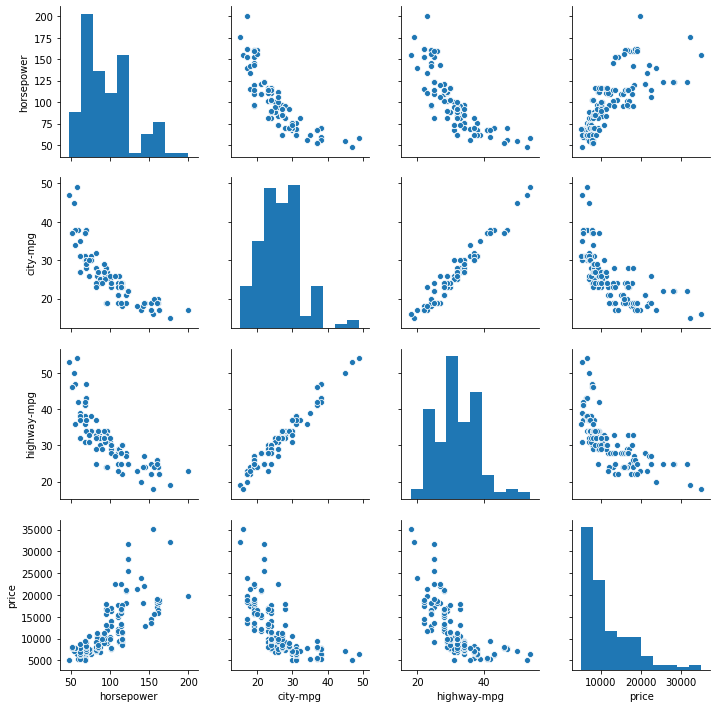

In [4]:
data_subset = data[['horsepower', 'city-mpg','highway-mpg', 'price']]

sns.pairplot(data_subset)

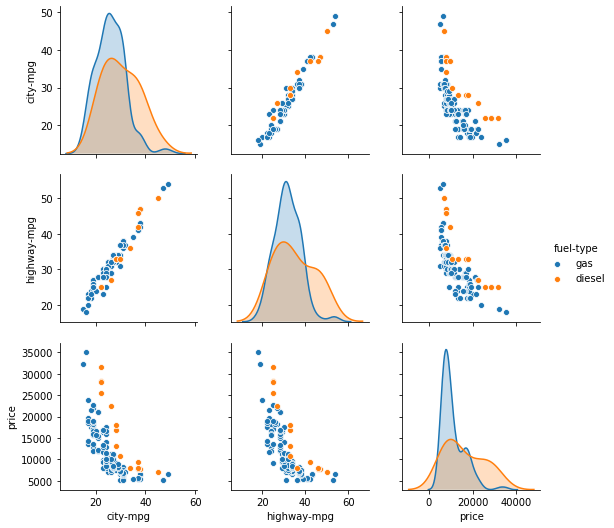

In [9]:
sns.pairplot(data, vars =['city-mpg','highway-mpg', 'price'], hue='fuel-type')
                            #vars will only show those variables in which we are intrested in 

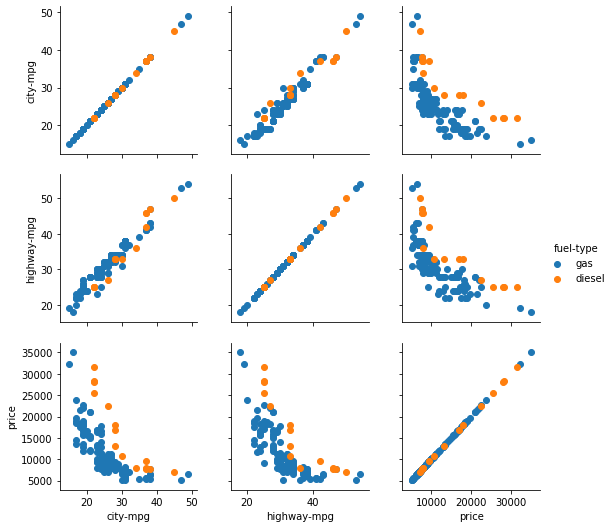

In [13]:
q = sns.PairGrid(data, vars =['city-mpg','highway-mpg', 'price'], hue='fuel-type')

q.map(plt.scatter)
q.add_legend()

plt.show()

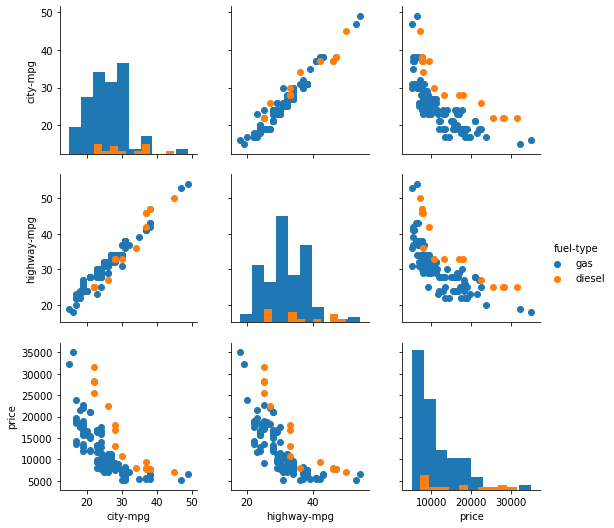

In [15]:
q = sns.PairGrid(data, vars =['city-mpg','highway-mpg', 'price'], hue='fuel-type')

q.map_diag(plt.hist)  #Along The main DIAGONAL
q.map_offdiag(plt.scatter)  ##Off sides of diagonal
q.add_legend()

plt.show()

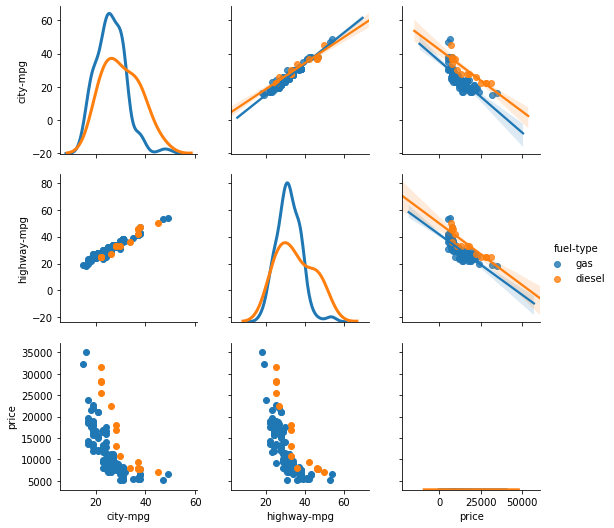

In [19]:
q = sns.PairGrid(data, vars =['city-mpg','highway-mpg', 'price'], hue='fuel-type')

q.map_lower(plt.scatter)
q.map_diag(sns.kdeplot, lw= 3, legend=False)  #Along The main DIAGONAL
q.map_upper(sns.regplot)
q.add_legend()

plt.show()

In [23]:
data_corr = data[['engine-size','horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price']].corr()
data_corr

,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
engine-size,1.000000,0.812073,-0.284686,-0.699139,-0.714095,0.841496
horsepower,0.812073,1.000000,0.074057,-0.837214,-0.827941,0.759874
peak-rpm,-0.284686,0.074057,1.000000,-0.052929,-0.032777,-0.171916
city-mpg,-0.699139,-0.837214,-0.052929,1.000000,0.971999,-0.692273
highway-mpg,-0.714095,-0.827941,-0.032777,0.971999,1.000000,-0.720090
price,0.841496,0.759874,-0.171916,-0.692273,-0.720090,1.000000


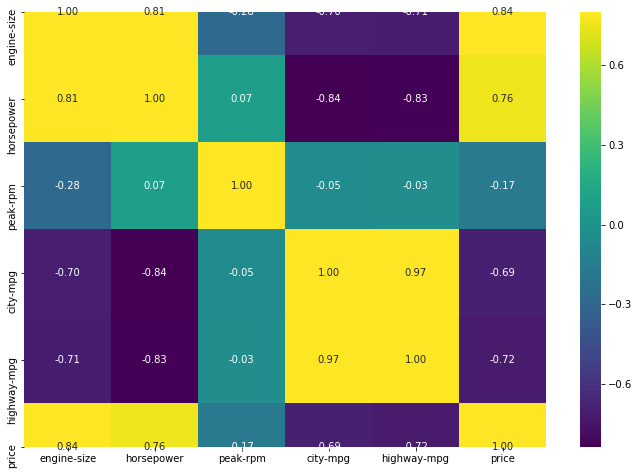

In [25]:
#Heat MAp

plt.figure(figsize=(12,8))

sns.heatmap(data_corr, vmax=0.8, square=True,annot=True,fmt='.2f',cmap='viridis')